#**Bike Sharing Linear Regression Model Building**

In [505]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Business** **Goal** 
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 






##**Problem Statement**
understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

###**Reading and Understaning the dataset**

In [506]:
#Importing all the necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [507]:
#Reading the data using Pandas library
bikes=pd.read_csv("/content/drive/MyDrive/day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [508]:
#checking the basic info of the dataset
bikes.shape

(730, 16)

In [509]:
#Checking the info to check whether the data has null values/not 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [510]:
#checking the numeric variable data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###**Preparing the data**

In [511]:
#Removing those variable which are not use full
#We don't need the Feature 'instant',it is just serial number of the dataset.
#We don't need the Feature 'dtday' because it is already expalained by the other features like: yr, mnth, weekday, workingday and holiday.
bikes.drop(['instant','dteday'],axis=1,inplace=True)

In [512]:
##--'cnt' variable indicates the total number of bike rentals, including both casual and registered.so, we can remove 'casual' and 'registered' variable
bikes.drop(['casual','registered'],axis=1,inplace=True)

In [513]:
#map all the values of categorical variable from data dictionary
#creating a dummy variable for those having values<2
season=pd.get_dummies(bikes.season,drop_first=True)
seasons=season.rename(columns={1:'spring',2:"summer",3:"fall",4:"winter"})

#adding these col in bikes dataframe
bikes=pd.concat([bikes,seasons],axis=1)
seasons.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [514]:
#creating dummy var for mnth col
month=pd.get_dummies(bikes.mnth,drop_first=True)
months=month.rename(columns={1:'jan',2:'feb',3:'mar',4:'aprl',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})
bikes=pd.concat([bikes,months],axis=1)


In [515]:
#creating dummy var for weekday col
day=pd.get_dummies(bikes.weekday,drop_first=True)
days=day.rename(columns={0:'sun',1:'mon',2:'tue',3:'wed',4:'thur',5:'fri',6:'sat'})
bikes=pd.concat([bikes,days],axis=1)

In [516]:
#creating dummy var for weathersit col
weather=pd.get_dummies(bikes.weathersit,drop_first=True)
weathers=weather.rename(columns={1:'clear',2:'mist',3:'light rain',4:'heavy rain'})
bikes=pd.concat([bikes,weathers],axis=1)

In [517]:
#dropping the unwanted col of categorical var
bikes.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

###**Visualization data**

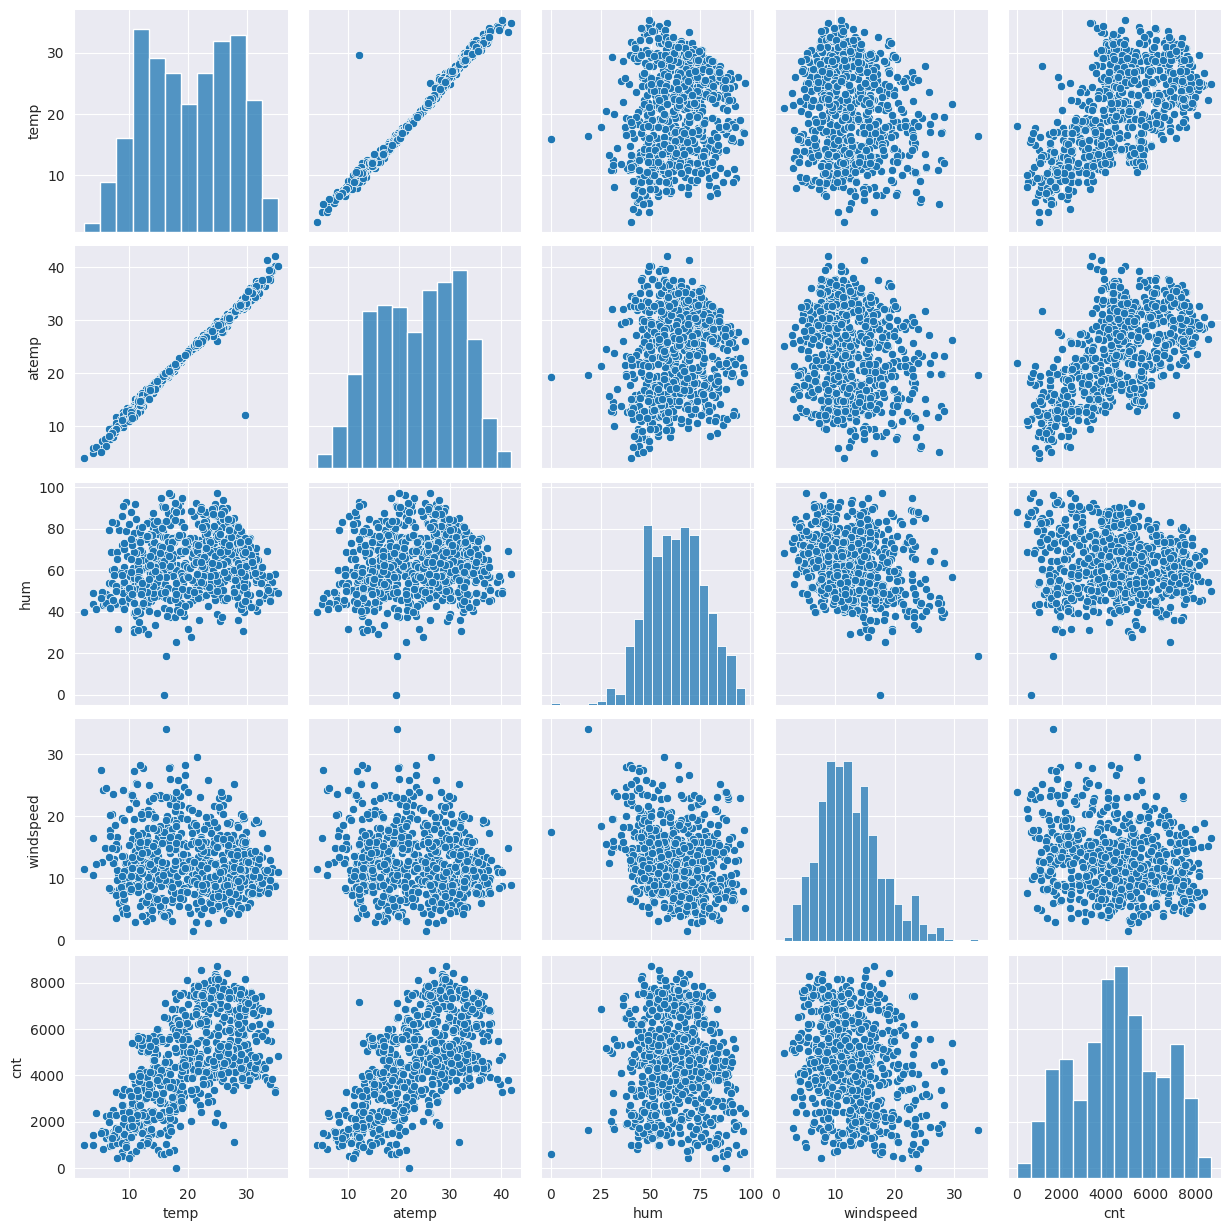

In [518]:
#visualize the numeric var
sns.pairplot(bikes[['temp','atemp','hum','windspeed','cnt']])
plt.show()

#####**Insight**
cnt has a  linear relationship with temp and atemp 

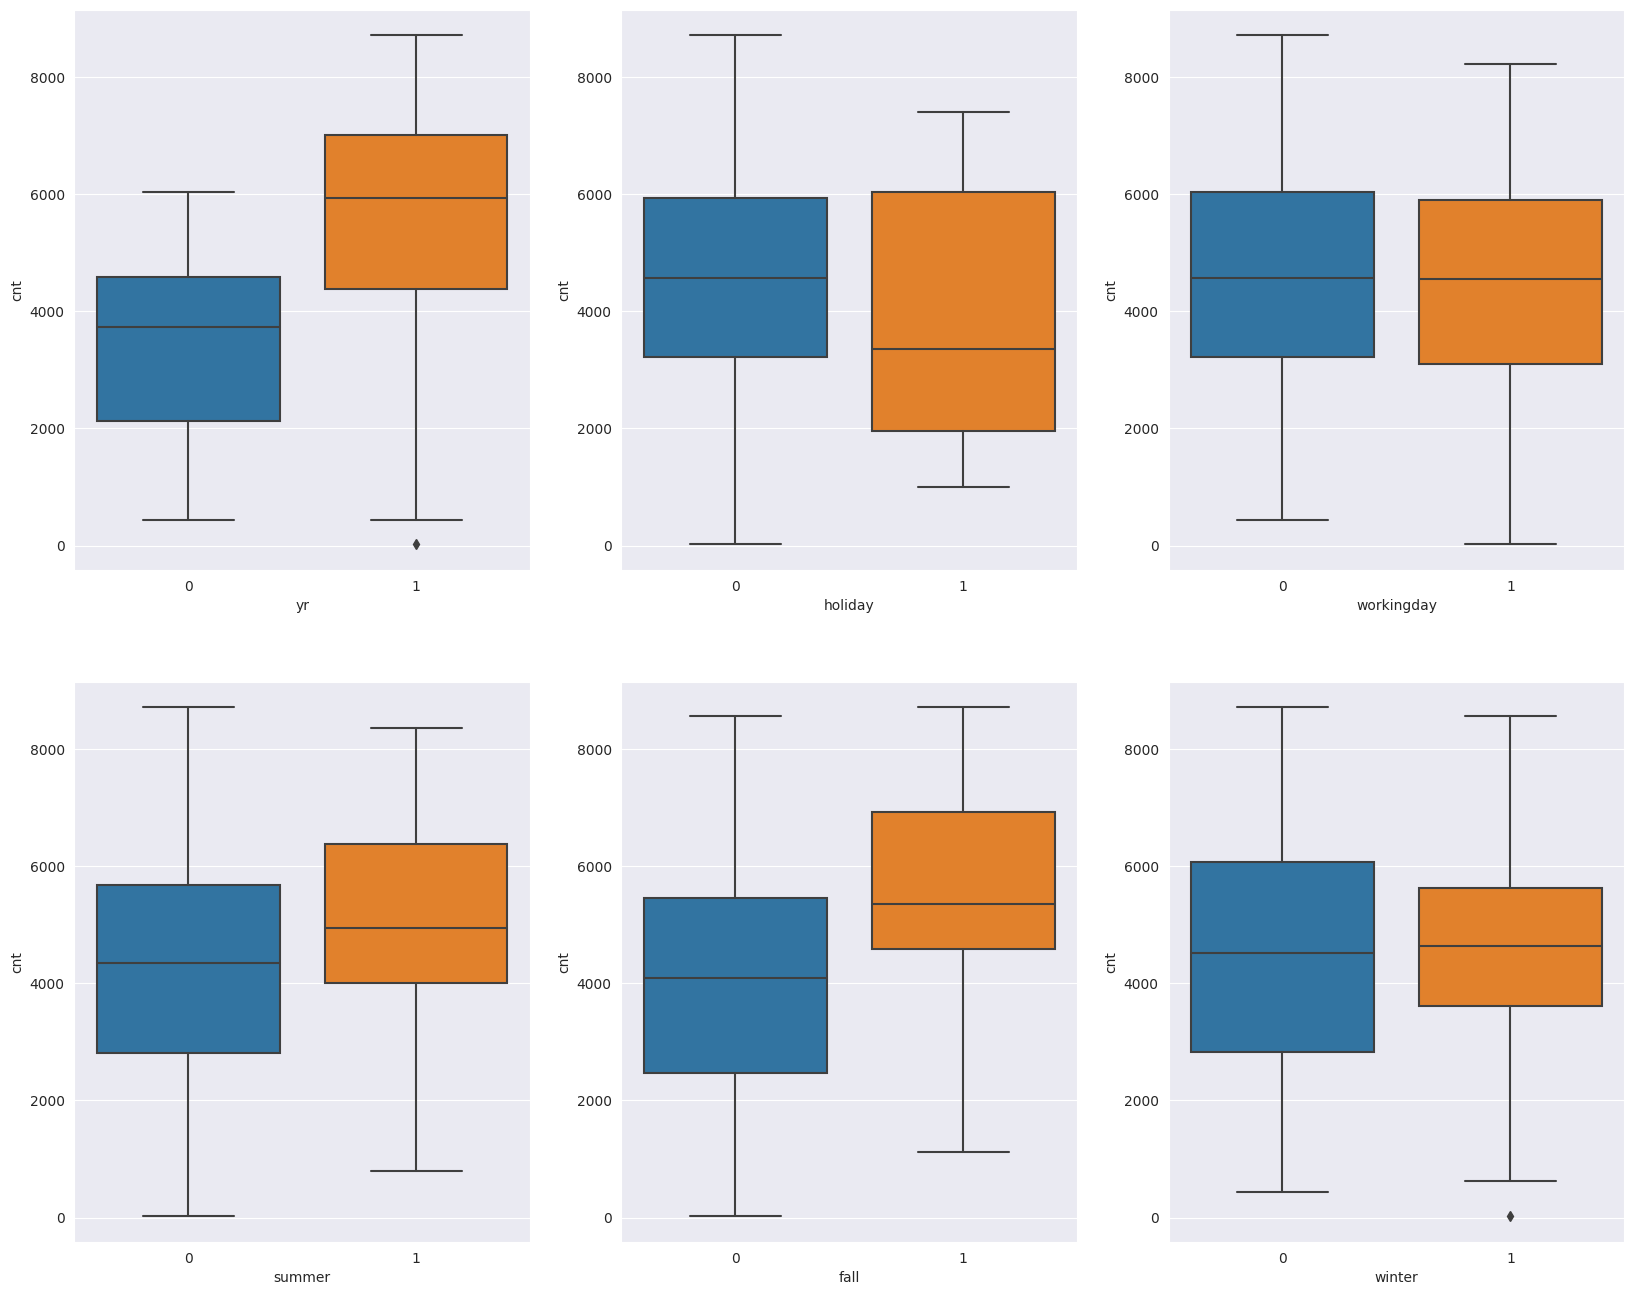

In [519]:
#visualising the categorical var
plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(x='yr',y='cnt', data=bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'summer', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'fall', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'winter', y = 'cnt', data = bikes)
plt.show()


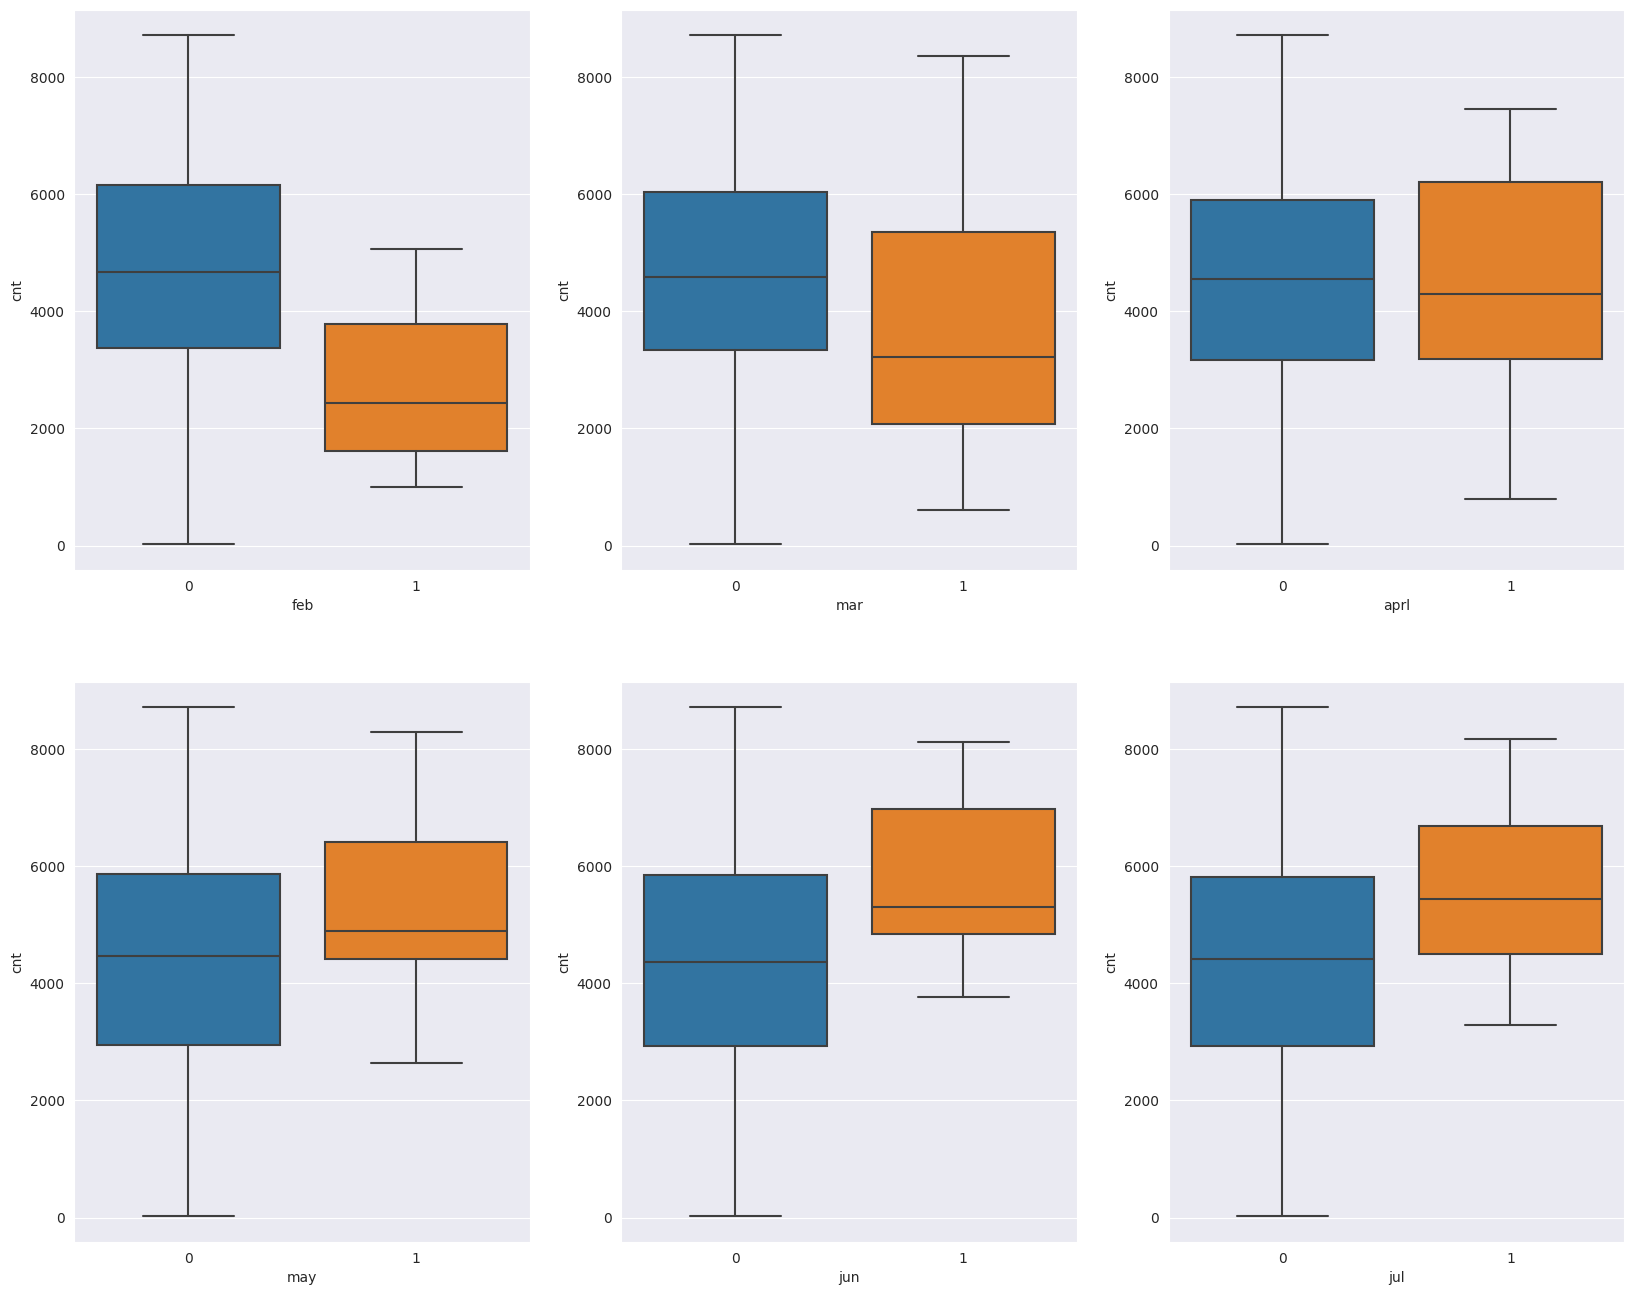

In [520]:
plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(x='feb',y='cnt', data=bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mar', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'aprl', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'may', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'jun', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'jul', y = 'cnt', data = bikes)
plt.show()


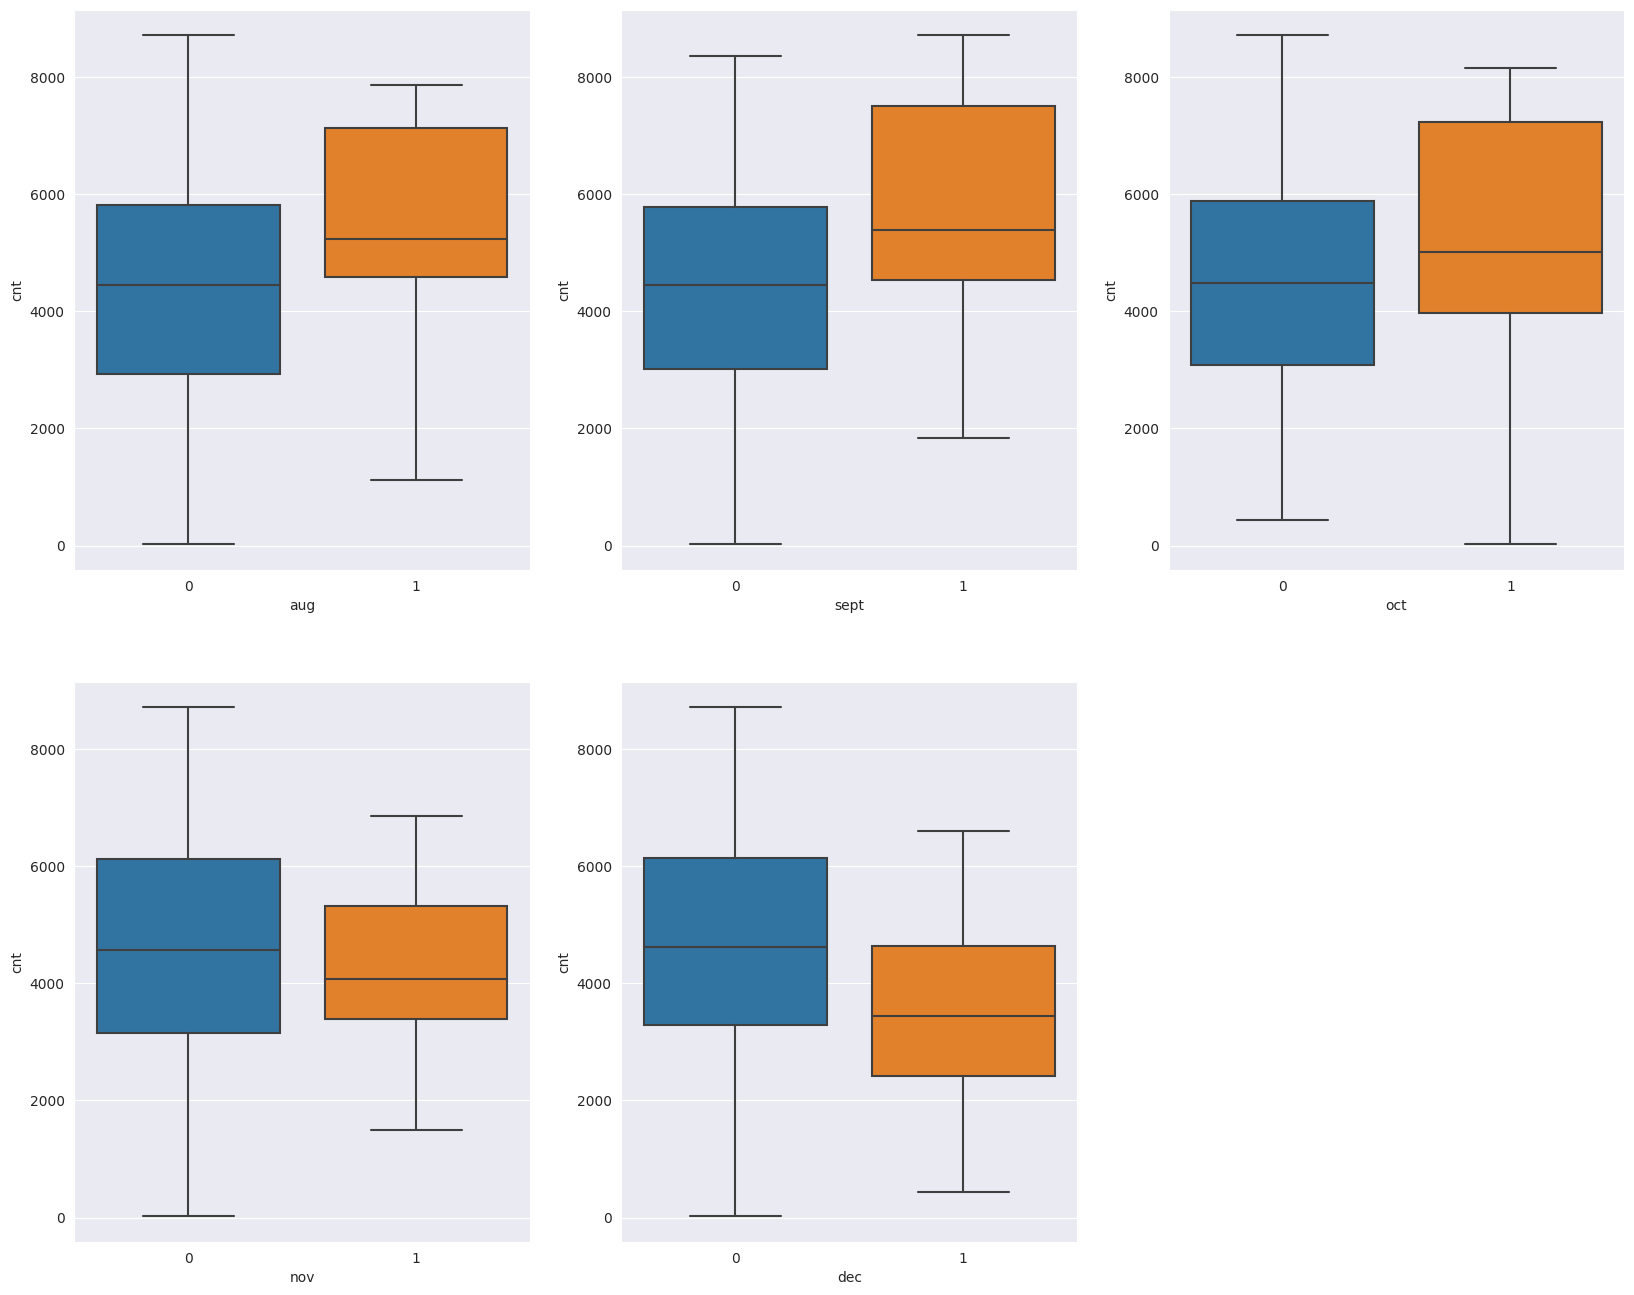

In [521]:
plt.figure(figsize=(20,16))

plt.subplot(2,3,1)
sns.boxplot(x='aug',y='cnt', data=bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'sept', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'oct', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'nov', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'dec', y = 'cnt', data = bikes)
plt.show()


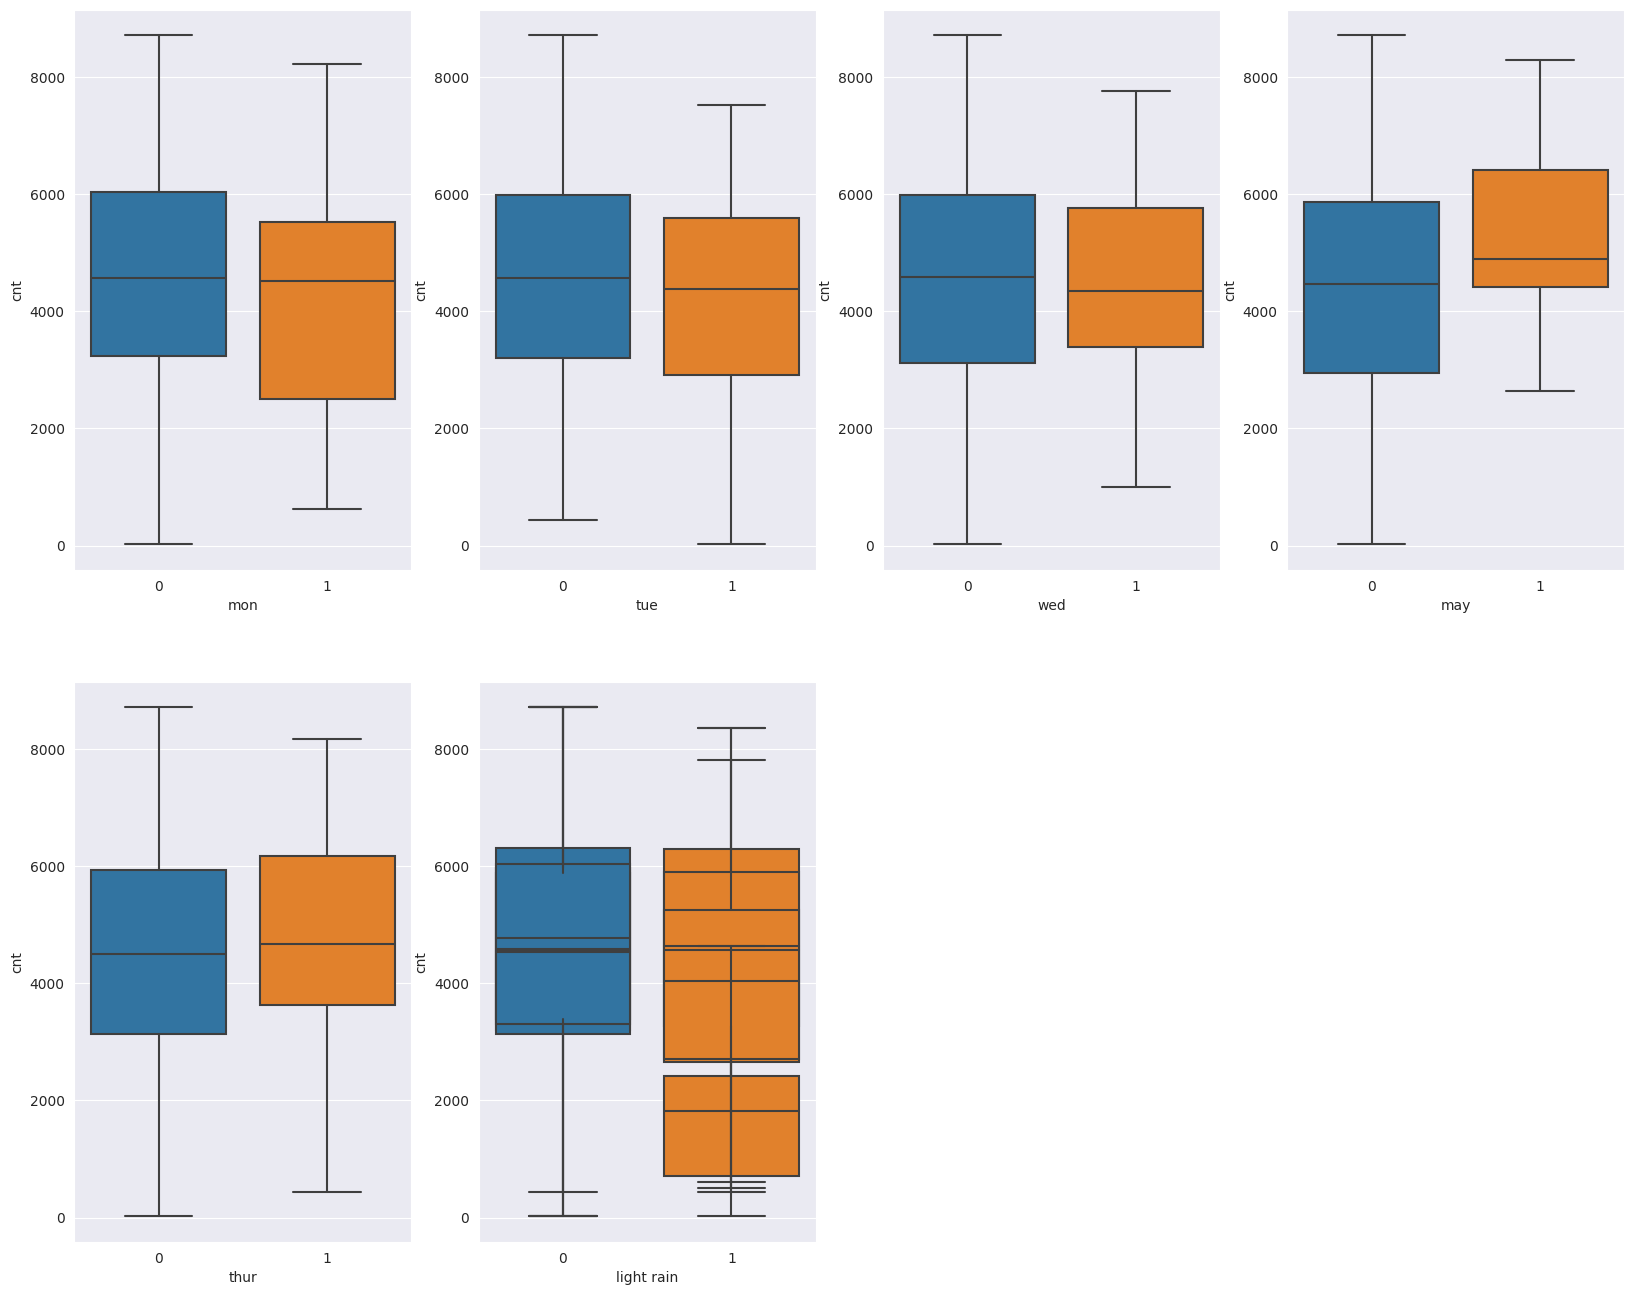

In [522]:
plt.figure(figsize=(20,16))

plt.subplot(2,4,1)
sns.boxplot(x='mon',y='cnt', data=bikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'tue', y = 'cnt', data = bikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'wed', y = 'cnt', data = bikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'may', y = 'cnt', data = bikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'thur', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'fri', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'sat', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'mist', y = 'cnt', data = bikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'light rain', y = 'cnt', data = bikes)

plt.show()


####**Insights**
-There is a increase in pattern in yr ,fall and summer with respect to cnt and remaining looks similar pattern

-At the start of the year cnt decrease and the then increase

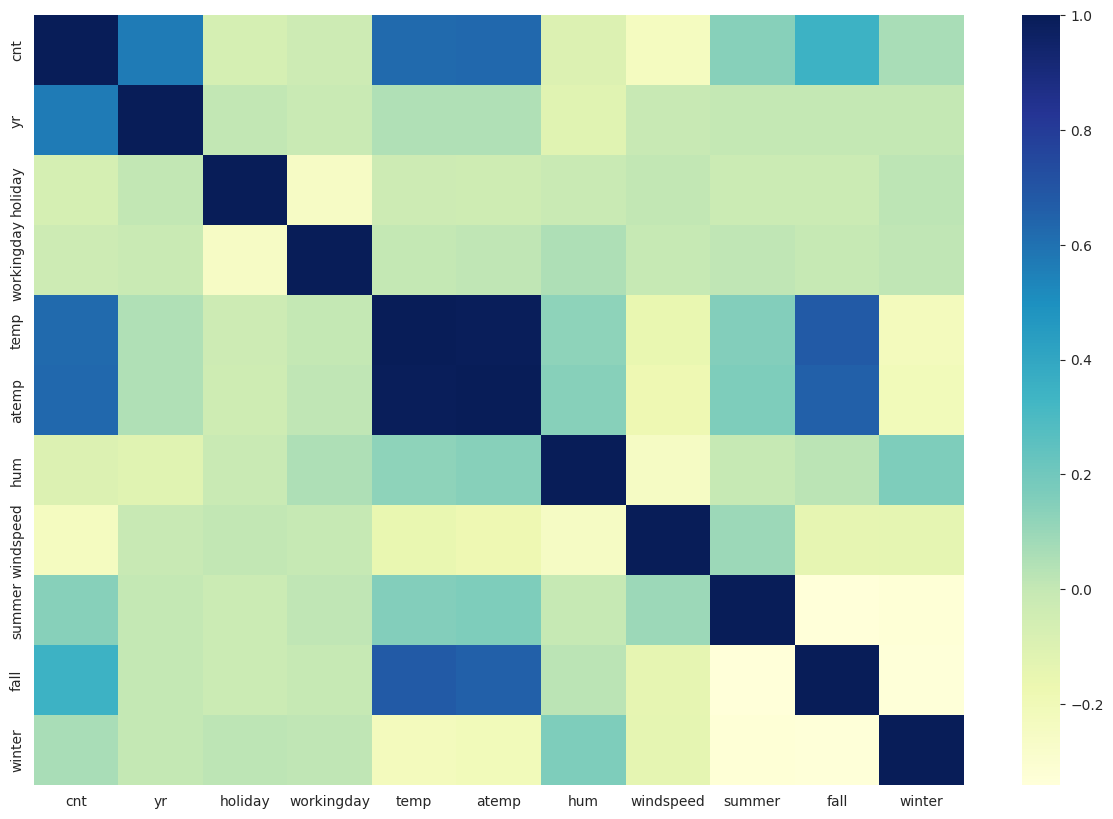

In [523]:
#finding the corr() bt the variables
plt.figure(figsize=(15,10))
sns.heatmap(bikes[['cnt','yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
        'summer', 'fall', 'winter']].corr(), cmap="YlGnBu")
plt.show()

In [524]:
#Temp and atemp are very strongly correlated one can be dropped
bikes=bikes.drop("atemp",axis=1)

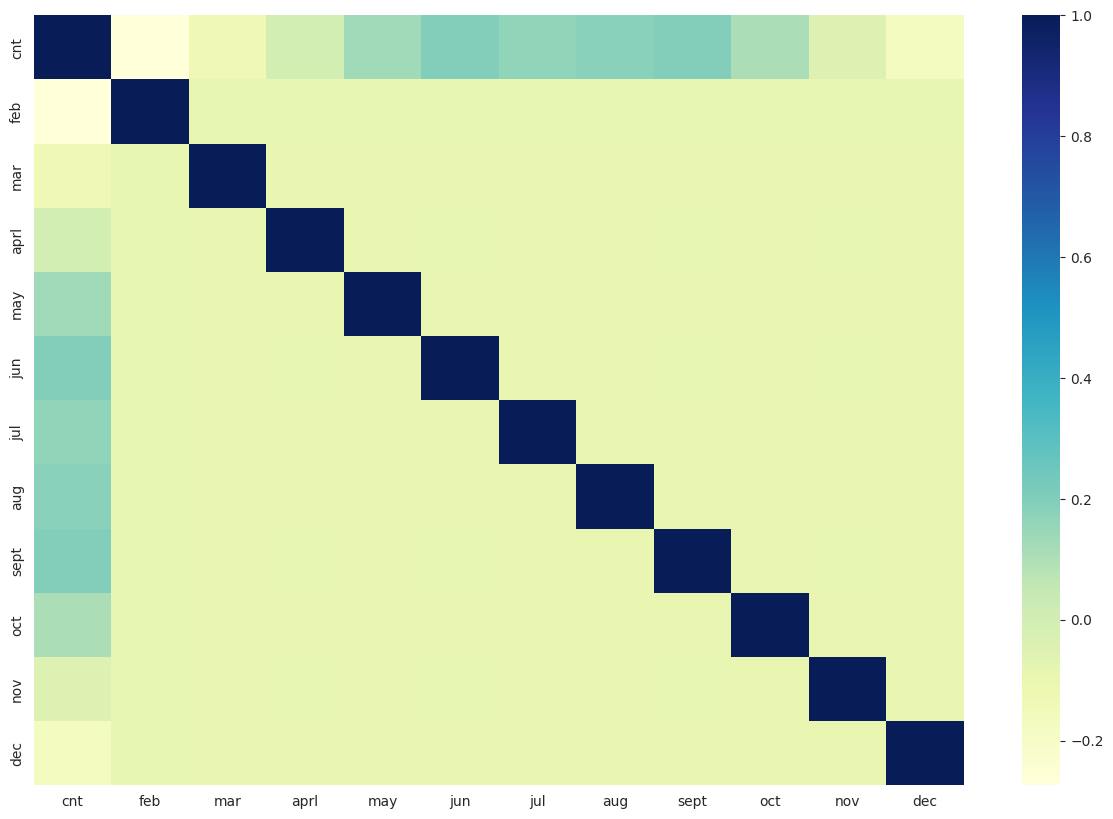

In [525]:
plt.figure(figsize=(15,10))
sns.heatmap(bikes[['cnt','feb', 'mar', 'aprl', 'may', 'jun',
       'jul', 'aug', 'sept', 'oct', 'nov', 'dec']].corr(), cmap="YlGnBu")
plt.show()

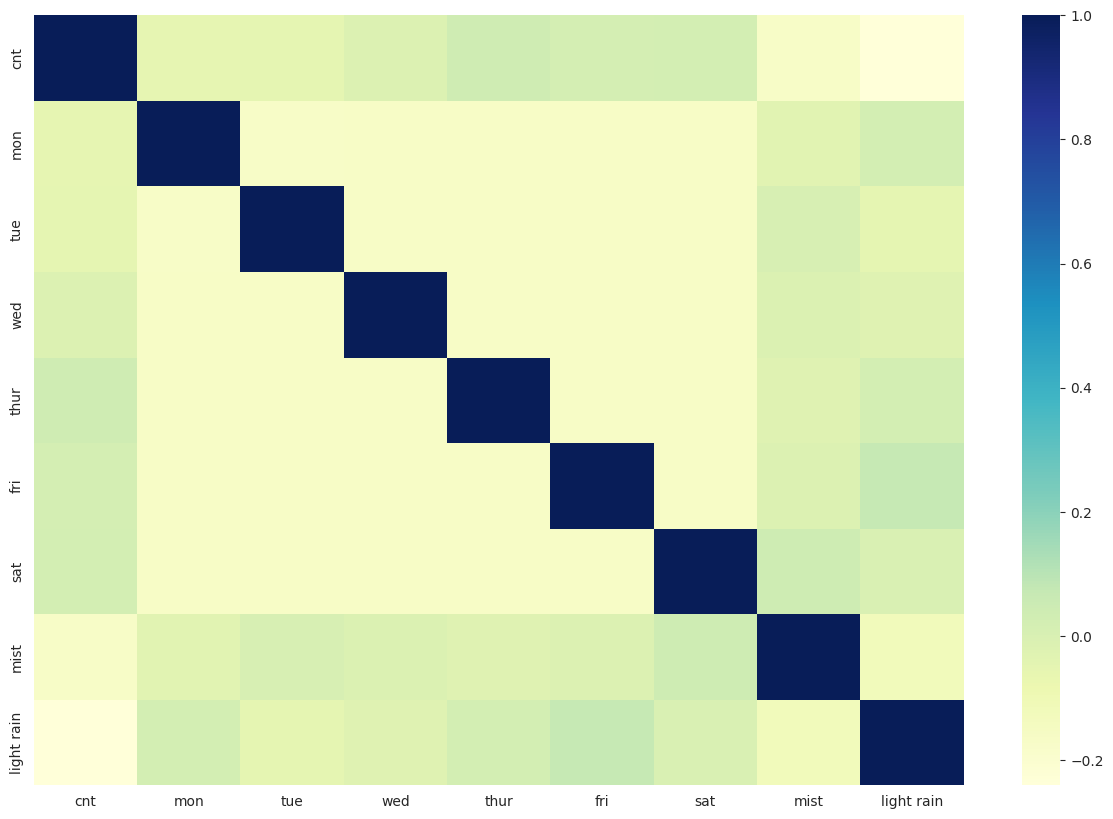

In [526]:
plt.figure(figsize=(15,10))
sns.heatmap(bikes[['cnt', 'mon', 'tue', 'wed', 'thur',
       'fri', 'sat', 'mist', 'light rain']].corr(), cmap="YlGnBu")
plt.show()

####**Insights**
-cnt has a corr with yr,temp,atemp,fall,summer

-From the month of 'May' bike demand starts increasing

In [527]:
#Importing necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


###**Training the Model**

In [528]:
#Splitting the Data into Training and Testing Sets
df_train, df_test =train_test_split(bikes,train_size=0.70,random_state=75)

In [529]:
#Rescaling to get the uniformity in the numeric variable
scaler=MinMaxScaler()
numer_var=['temp','hum','windspeed','cnt']

#fit the data
df_train[numer_var]=scaler.fit_transform(df_train[numer_var])

In [530]:
#checking the scaled value
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer,fall,winter,...,nov,dec,mon,tue,wed,thur,fri,sat,mist,light rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.027451,0.705882,0.515019,0.648920,0.321427,0.512220,0.282353,0.235294,0.243137,...,0.080392,0.098039,0.143137,0.156863,0.143137,0.149020,0.137255,0.131373,0.350980,0.021569
std,0.500487,0.163554,0.456092,0.238100,0.147024,0.171634,0.221167,0.450586,0.424599,0.429398,...,0.272166,0.297660,0.350557,0.364028,0.350557,0.356457,0.344454,0.338139,0.477745,0.145413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.308410,0.538858,0.196859,0.357800,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.508263,0.652855,0.300785,0.516222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726903,0.754294,0.413008,0.676455,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [532]:
#Training the Model
y_train=df_train[["cnt"]]
x_train=df_train.drop(["cnt"],axis=1)


In [534]:
#Since there are 28 feature variable , finding the top 15 using RFE to make easier
lr=LinearRegression()
lr.fit(x_train,y_train)

rfe = RFE(estimator=lr,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('feb', False, 9),
 ('mar', True, 1),
 ('aprl', False, 2),
 ('may', True, 1),
 ('jun', False, 3),
 ('jul', False, 10),
 ('aug', False, 4),
 ('sept', True, 1),
 ('oct', False, 8),
 ('nov', True, 1),
 ('dec', True, 1),
 ('mon', False, 13),
 ('tue', False, 12),
 ('wed', False, 11),
 ('thur', False, 7),
 ('fri', False, 6),
 ('sat', False, 14),
 ('mist', True, 1),
 ('light rain', True, 1)]

In [535]:
#getting the list of top features
col=x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'mar', 'may', 'sept', 'nov', 'dec', 'mist', 'light rain'],
      dtype='object')

In [536]:
x_train.columns[~(rfe.support_)]

Index(['workingday', 'feb', 'aprl', 'jun', 'jul', 'aug', 'oct', 'mon', 'tue',
       'wed', 'thur', 'fri', 'sat'],
      dtype='object')

#**Model Building**

###**Model 1**

In [537]:
x_train_rfe = x_train[col]

#add constant before creating the model
x_train_sm=sm.add_constant(x_train_rfe)

#Creating the model
lr=sm.OLS(y_train,x_train_sm).fit()

#params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          3.66e-183
Time:                        08:15:00   Log-Likelihood:                 508.13
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     494   BIC:                            -916.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2428      0.028      8.810      0.000       0.189       0.297
yr             0.2277      0.008     27.667      0.000       0.212       0.244
holiday       -0.0864      0.025     -3.451      0.001      -0.136      -0.037
temp           0.4560      0.033     13.870      0.000       0.391       0.521
hum           -0.1627      0.038     -4.274      0.000      -0.238      -0.088
windspeed     -0.1611      0.026     -6.257      0.000      -0.212      -0.111
summer         0.1177      0.016      7.559      0.000       0.087       0.148
fall           0.0669      0.022      3.066      0.002       0.024       0.110
winter         0.2076      0.016     13.131      0.000       0.177       0.239
mar            0.0333      0.016      2.129      0.034       0.003       0.064
may            0.0199      0.017      1.163      0.245      -0.014       0.054
sept           0.1047      0.017      6.014      0.000       0.071       0.139
nov           -0.0572      0.019     -2.983      0.003      -0.095      -0.020
dec           -0.0392      0.016     -2.431      0.015      -0.071      -0.008
mist          -0.0513      0.010     -4.886      0.000      -0.072      -0.031
light rain    -0.2382      0.031     -7.806      0.000      -0.298      -0.178
==============================================================================
Omnibus:                       87.908   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.313
Skew:                          -0.919   Prob(JB):                     1.05e-42
Kurtosis:                       5.391   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [538]:
x_train_sm.shape

(510, 16)

In [539]:
#Getting the VIF values 
vif=pd.DataFrame()
vif["Features"]=x_train_rfe.columns

vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range (x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,20.96
3,hum,14.17
6,fall,6.92
5,summer,4.22
7,winter,3.76
4,windspeed,3.69
13,mist,2.10
0,yr,2.00
11,nov,1.79
9,may,1.60


###Removing 'may' feature var as it has high p-value and then re-building the model

#**Model 2**

In [540]:
#dropping 'may' var
x_train_rfe = x_train_rfe.drop(["may"], axis = 1)

In [541]:
#Re-building the model

#add constant before creating the model
x_train_sm=sm.add_constant(x_train_rfe)

#Creating the model
lr2=sm.OLS(y_train,x_train_sm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          5.23e-184
Time:                        08:15:00   Log-Likelihood:                 507.43
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2377      0.027      8.733      0.000       0.184       0.291
yr             0.2278      0.008     27.661      0.000       0.212       0.244
holiday       -0.0856      0.025     -3.416      0.001      -0.135      -0.036
temp           0.4622      0.032     14.243      0.000       0.398       0.526
hum           -0.1555      0.038     -4.139      0.000      -0.229      -0.082
windspeed     -0.1615      0.026     -6.269      0.000      -0.212      -0.111
summer         0.1214      0.015      7.966      0.000       0.091       0.151
fall           0.0624      0.021      2.906      0.004       0.020       0.105
winter         0.2051      0.016     13.091      0.000       0.174       0.236
mar            0.0304      0.015      1.971      0.049    9.68e-05       0.061
sept           0.1048      0.017      6.014      0.000       0.071       0.139
nov           -0.0561      0.019     -2.930      0.004      -0.094      -0.018
dec           -0.0388      0.016     -2.408      0.016      -0.071      -0.007
mist          -0.0518      0.010     -4.935      0.000      -0.072      -0.031
light rain    -0.2406      0.030     -7.903      0.000      -0.300      -0.181
==============================================================================
Omnibus:                       88.226   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.064
Skew:                          -0.928   Prob(JB):                     3.24e-42
Kurtosis:                       5.355   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [542]:
#Getting the VIF values 
vif=pd.DataFrame()
vif["Features"]=x_train_rfe.columns

vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range (x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,20.54
3,hum,14.11
6,fall,6.71
5,summer,4.05
7,winter,3.69
4,windspeed,3.63
12,mist,2.10
0,yr,2.00
10,nov,1.79
11,dec,1.55


###feature var 'hum' has high VIF and removing it and re-building

###**Model 3**

In [543]:
#dropping 'hum' var
x_train_rfe = x_train_rfe.drop(["hum"], axis = 1)

In [544]:
#Re-building the model

#add constant before creating the model
x_train_sm=sm.add_constant(x_train_rfe)

#Creating the model
lr3=sm.OLS(y_train,x_train_sm).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          1.64e-181
Time:                        08:15:00   Log-Likelihood:                 498.76
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     496   BIC:                            -910.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1480      0.017      8.852      0.000       0.115       0.181
yr             0.2329      0.008     28.162      0.000       0.217       0.249
holiday       -0.0870      0.025     -3.419      0.001      -0.137      -0.037
temp           0.4313      0.032     13.441      0.000       0.368       0.494
windspeed     -0.1281      0.025     -5.152      0.000      -0.177      -0.079
summer         0.1245      0.015      8.053      0.000       0.094       0.155
fall           0.0708      0.022      3.258      0.001       0.028       0.113
winter         0.2015      0.016     12.677      0.000       0.170       0.233
mar            0.0322      0.016      2.053      0.041       0.001       0.063
sept           0.0957      0.018      5.449      0.000       0.061       0.130
nov           -0.0540      0.019     -2.778      0.006      -0.092      -0.016
dec           -0.0436      0.016     -2.664      0.008      -0.076      -0.011
mist          -0.0767      0.009     -8.802      0.000      -0.094      -0.060
light rain    -0.2848      0.029     -9.828      0.000      -0.342      -0.228
==============================================================================
Omnibus:                       84.062   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.271
Skew:                          -0.887   Prob(JB):                     2.63e-40
Kurtosis:                       5.330   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [545]:
#Getting the VIF values 
vif=pd.DataFrame()
vif["Features"]=x_train_rfe.columns

vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range (x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,13.84
5,fall,6.53
4,summer,4.04
6,winter,3.66
3,windspeed,3.31
0,yr,1.99
9,nov,1.76
11,mist,1.51
10,dec,1.40
8,sept,1.33


###Removing the 'fall' var because it has high VIF and then re_building

###**Model 4**

In [546]:
#dropping 'fall' var
x_train_rfe = x_train_rfe.drop(["fall"], axis = 1)

In [547]:
#Re-building the model

#add constant before creating the model
x_train_sm=sm.add_constant(x_train_rfe)

#Creating the model
lr4=sm.OLS(y_train,x_train_sm).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          2.12e-180
Time:                        08:15:00   Log-Likelihood:                 493.36
No. Observations:                 510   AIC:                            -960.7
Df Residuals:                     497   BIC:                            -905.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1405      0.017      8.405      0.000       0.108       0.173
yr             0.2309      0.008     27.731      0.000       0.215       0.247
holiday       -0.0948      0.026     -3.707      0.000      -0.145      -0.045
temp           0.5132      0.020     25.509      0.000       0.474       0.553
windspeed     -0.1307      0.025     -5.212      0.000      -0.180      -0.081
summer         0.0866      0.010      8.434      0.000       0.066       0.107
winter         0.1710      0.013     13.183      0.000       0.146       0.196
mar            0.0243      0.016      1.553      0.121      -0.006       0.055
sept           0.1133      0.017      6.717      0.000       0.080       0.146
nov           -0.0427      0.019     -2.211      0.028      -0.081      -0.005
dec           -0.0383      0.016     -2.334      0.020      -0.071      -0.006
mist          -0.0765      0.009     -8.692      0.000      -0.094      -0.059
light rain    -0.2850      0.029     -9.741      0.000      -0.342      -0.227
==============================================================================
Omnibus:                       70.442   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.655
Skew:                          -0.795   Prob(JB):                     2.12e-30
Kurtosis:                       4.976   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [548]:
#Getting the VIF values 
vif=pd.DataFrame()
vif["Features"]=x_train_rfe.columns

vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range (x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,3.69
3,windspeed,3.25
5,winter,2.31
0,yr,1.97
4,summer,1.72
8,nov,1.72
10,mist,1.51
9,dec,1.40
7,sept,1.21
6,mar,1.17


###Removing 'mar' has high P-value and re-building

###**Model 5**

In [549]:
#dropping 'mar' var
x_train_rfe = x_train_rfe.drop(["mar"], axis = 1)

In [550]:
#Re-building the model

#add constant before creating the model
x_train_sm=sm.add_constant(x_train_rfe)

#Creating the model
lr5=sm.OLS(y_train,x_train_sm).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.8
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          4.67e-181
Time:                        08:15:00   Log-Likelihood:                 492.13
No. Observations:                 510   AIC:                            -960.3
Df Residuals:                     498   BIC:                            -909.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1455      0.016      8.853      0.000       0.113       0.178
yr             0.2317      0.008     27.842      0.000       0.215       0.248
holiday       -0.0964      0.026     -3.768      0.000      -0.147      -0.046
temp           0.5069      0.020     25.694      0.000       0.468       0.546
windspeed     -0.1277      0.025     -5.100      0.000      -0.177      -0.079
summer         0.0868      0.010      8.442      0.000       0.067       0.107
winter         0.1688      0.013     13.074      0.000       0.143       0.194
sept           0.1118      0.017      6.629      0.000       0.079       0.145
nov           -0.0445      0.019     -2.301      0.022      -0.082      -0.006
dec           -0.0413      0.016     -2.531      0.012      -0.073      -0.009
mist          -0.0764      0.009     -8.670      0.000      -0.094      -0.059
light rain    -0.2844      0.029     -9.710      0.000      -0.342      -0.227
==============================================================================
Omnibus:                       71.732   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.442
Skew:                          -0.804   Prob(JB):                     3.19e-31
Kurtosis:                       5.005   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [551]:
#Getting the VIF values 
vif=pd.DataFrame()
vif["Features"]=x_train_rfe.columns

vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range (x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,3.66
3,windspeed,3.06
5,winter,2.30
0,yr,1.95
4,summer,1.72
7,nov,1.72
9,mist,1.51
8,dec,1.39
6,sept,1.21
10,light rain,1.08


###Removing 'nov' has some p-value and re-building

###**Model 6**

In [552]:
#dropping 'nov' var
x_train_rfe = x_train_rfe.drop(["nov"], axis = 1)

In [553]:
#Re-building the model

#add constant before creating the model
x_train_sm=sm.add_constant(x_train_rfe)

#Creating the model
lr6=sm.OLS(y_train,x_train_sm).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          4.10e-181
Time:                        08:15:00   Log-Likelihood:                 489.43
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     499   BIC:                            -910.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1396      0.016      8.563      0.000       0.108       0.172
yr             0.2321      0.008     27.776      0.000       0.216       0.249
holiday       -0.1033      0.026     -4.048      0.000      -0.153      -0.053
temp           0.5146      0.020     26.361      0.000       0.476       0.553
windspeed     -0.1268      0.025     -5.041      0.000      -0.176      -0.077
summer         0.0875      0.010      8.481      0.000       0.067       0.108
winter         0.1528      0.011     13.981      0.000       0.131       0.174
sept           0.1145      0.017      6.777      0.000       0.081       0.148
dec           -0.0280      0.015     -1.825      0.069      -0.058       0.002
mist          -0.0759      0.009     -8.578      0.000      -0.093      -0.059
light rain    -0.2846      0.029     -9.674      0.000      -0.342      -0.227
==============================================================================
Omnibus:                       68.676   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.097
Skew:                          -0.792   Prob(JB):                     1.53e-28
Kurtosis:                       4.876   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [554]:
#Getting the VIF values 
vif=pd.DataFrame()
vif["Features"]=x_train_rfe.columns

vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range (x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,3.63
3,windspeed,3.03
0,yr,1.95
4,summer,1.72
5,winter,1.52
8,mist,1.51
7,dec,1.24
6,sept,1.20
9,light rain,1.08
1,holiday,1.04


###Removing 'dec' var has VIF>0.05 and then re-building model

###**Model 7**

In [555]:
#dropping 'dec' var
x_train_rfe = x_train_rfe.drop(["dec"], axis = 1)

In [556]:
#Re-building the model

#add constant before creating the model
x_train_sm=sm.add_constant(x_train_rfe)

#Creating the model
lr7=sm.OLS(y_train,x_train_sm).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     258.1
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          1.30e-181
Time:                        08:15:00   Log-Likelihood:                 487.73
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     500   BIC:                            -913.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1316      0.016      8.362      0.000       0.101       0.162
yr             0.2321      0.008     27.707      0.000       0.216       0.249
holiday       -0.1020      0.026     -3.990      0.000      -0.152      -0.052
temp           0.5233      0.019     27.571      0.000       0.486       0.561
windspeed     -0.1226      0.025     -4.884      0.000      -0.172      -0.073
summer         0.0891      0.010      8.655      0.000       0.069       0.109
winter         0.1489      0.011     13.859      0.000       0.128       0.170
sept           0.1163      0.017      6.879      0.000       0.083       0.150
mist          -0.0764      0.009     -8.613      0.000      -0.094      -0.059
light rain    -0.2858      0.029     -9.693      0.000      -0.344      -0.228
==============================================================================
Omnibus:                       66.051   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.902
Skew:                          -0.779   Prob(JB):                     1.52e-26
Kurtosis:                       4.780   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [557]:
#Getting the VIF values 
vif=pd.DataFrame()
vif["Features"]=x_train_rfe.columns

vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range (x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,3.61
3,windspeed,3.00
0,yr,1.94
4,summer,1.72
7,mist,1.49
5,winter,1.38
6,sept,1.20
8,light rain,1.08
1,holiday,1.04


In [558]:
x_train_rfe.head()

,yr,holiday,temp,windspeed,summer,winter,sept,mist,light rain
100,0,0,0.652334,0.606610,1,0,0,1,0
262,0,0,0.607918,0.199179,0,0,1,1,0
240,0,0,0.705938,0.252647,0,0,0,0,0
338,0,0,0.378113,0.042790,0,1,0,1,0
297,0,0,0.490293,0.267336,0,1,0,0,0


###Removing 'aug' var since it has some p-values and then re-building the model

###In Model 7
 We have Prob(F-statistic) is very low Which tells Overall model is a good Fit.

We got quite Good Adjusted R2 Score i.e 81.3%

All the P Value are 0 , Which say that all the 8 Features are Statistically Significant

Hence we can go ahaed with the current Model for Prediction and Evaluation.

###**Residual Analysis**

In [559]:
x_train_rfe.shape

(510, 9)

In [560]:
#adding constant
x_train_rfe=sm.add_constant(x_train_rfe)

In [561]:
x_train_rfe.head()

,const,yr,holiday,temp,windspeed,summer,winter,sept,mist,light rain
100,1.0,0,0,0.652334,0.606610,1,0,0,1,0
262,1.0,0,0,0.607918,0.199179,0,0,1,1,0
240,1.0,0,0,0.705938,0.252647,0,0,0,0,0
338,1.0,0,0,0.378113,0.042790,0,1,0,1,0
297,1.0,0,0,0.490293,0.267336,0,1,0,0,0


In [562]:
# Calculation of Error in Prediction for Training Data
y_train_pred=lr7.predict(x_train_rfe)
y_train_pred=pd.DataFrame(y_train_pred)
y_train_pred1=y_train_pred.rename(columns={0:'cnt'})

#residual
res = y_train - y_train_pred1

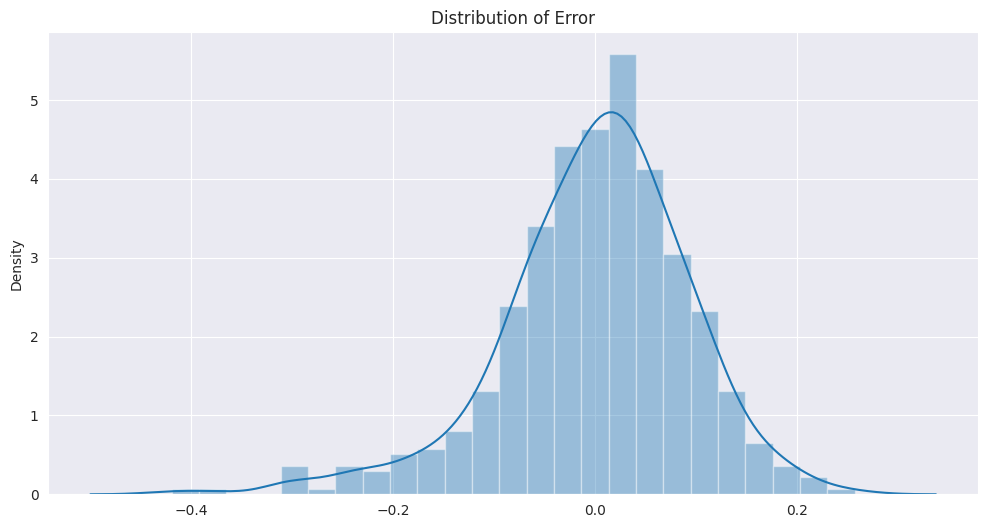

In [563]:
#visualing the error
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error')
plt.show()

### We can see Error Terms are normally Distributed 

###Model predicts well 

###**Prediction and Evaluation**

In [565]:
#Rescaling to get the uniformity in the numeric variable
numer_var=['temp','hum','windspeed','cnt']

#fit the data
df_test[numer_var]=scaler.transform(df_test[numer_var])

In [566]:
#add constant in test by spliting x_test and y_test
#Training the Model
y_test=df_test[['cnt']]
x_test=df_test.drop(['cnt'],axis=1)
x_test_sm = sm.add_constant(x_test)

In [568]:
#Dropping those col while not used in model building
x_test_sm = x_test_sm.drop(['workingday','hum','fall','feb','mar','aprl','may','jun','jul','aug','oct','nov','dec','mon','tue','wed',
       'thur','fri','sat'],axis=1)

In [570]:
#y_test prediction
y_test_pred = lr7.predict(x_test_sm)

In [573]:
#Evaluation of predicted
r2_score(y_test,y_test_pred)

0.809388909078581

###**The Final Model accuray is around 80.9%, Which is a Good Score.**
###**The Model accuracy difference between the Train and Test Data is less than 2% which is acceptable.**

In [574]:
Cofficients = round(lr7.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.52
yr            0.23
winter        0.15
const         0.13
sept          0.12
summer        0.09
mist         -0.08
holiday      -0.10
windspeed    -0.12
light rain   -0.29
dtype: float64

In [575]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.52 * temp + 0.23 * yr + 0.15 * winter + 0.13 * const + 0.12 * sept + 0.09 * summer + -0.08 * mist + -0.1 * holiday + -0.12 * windspeed + -0.29 * light rain + 

###**Equation of Best Fit Line** :

##cnt = 0.52 * temp + 0.23 * yr + 0.15 * winter + 0.12 * sep + 0.09 * summer -0.08 * mist -0.1 * holiday - 0.12 * windspeed - 0.29 * light rain + 0.19

###**Insights**

##--TEMPERATURE is the Most Significant Feature ,as it has .50 percent in deciding the demand

##--Demand of bike is more in WINTER and SUMMER

##--In the mid of the year, there is some increase in use of Shared bikes

##--Rainy days and windspeed affects the demand of shared bikes

#                                   **----- END -----**